In [71]:
from pamplona_weather import get_pamplona_weather_history
from datetime import datetime

weather_history = get_pamplona_weather_history(
    start = datetime(day = 1, month = 1, year = 2016),
    end = datetime(day = 31, month = 12, year = 2016))


In [21]:
months = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio',
          'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

mean = lambda X:sum(X)/len(X) 

temperatures = []
for month_number in range(1, len(months)+1):
    temperatures_in_month = [weather.get_temperature() for weather in weather_history if
     weather.get_timestamp().month == month_number]
    temperatures.append(mean(temperatures_in_month))
    


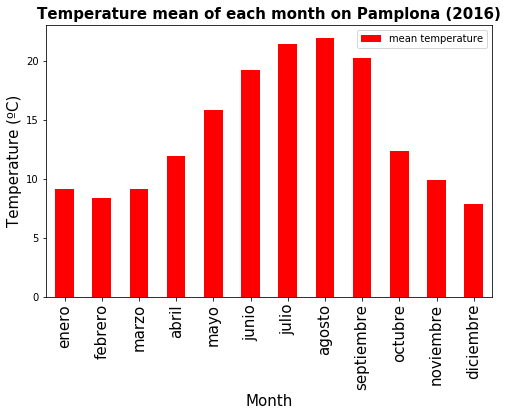

In [66]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

frame = pd.DataFrame()
frame['mean temperature'] = temperatures

fig, ax = plt.subplots(figsize = (8, 5))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Temperature (ºC)' , fontsize=15)

ax.set_title('Temperature mean of each month on Pamplona (2016)', fontsize=15, fontweight='bold')
plot = frame.plot.bar(ax = ax, color = 'red')
plot.xaxis.set_major_formatter(ticker.FixedFormatter(months))

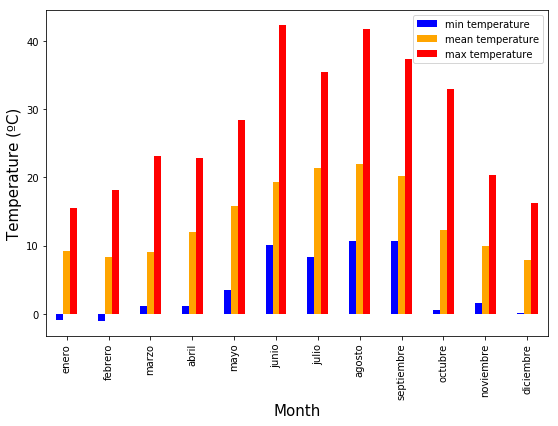

In [74]:
min_temperatures = []
max_temperatures = []
for month_number in range(1, len(months)+1):
    temperatures_in_month = [weather.get_temperature() for weather in weather_history if
                weather.get_timestamp().month == month_number]
    min_temperatures.append(min(temperatures_in_month))
    max_temperatures.append(max(temperatures_in_month))
    


frame = pd.DataFrame()
frame['min temperature'] = min_temperatures
frame['mean temperature'] = temperatures
frame['max temperature'] = max_temperatures

fig, ax = plt.subplots(figsize = (9, 6))
ax.set_xlabel('Month', fontsize = 15)
ax.set_ylabel('Temperature (ºC)', fontsize = 15)

plot = frame.plot.bar(ax = ax, color = ['blue', 'orange', 'red'])
plot.xaxis.set_major_formatter(ticker.FixedFormatter(months))